# A comprehensive guide for Linear, Ridge and Lasso regression

**Reference:** https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/#

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# loading big mart sales dataset
train_set = pd.read_csv('/home/garvit/Downloads/Compressed/bigmart-sales-data/Train.csv')
test_set = pd.read_csv('/home/garvit/Downloads/Compressed/bigmart-sales-data/Test.csv')

In [3]:
train_set.sample(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8328,FDI57,19.850,Low Fat,0.054246,Seafood,196.0768,OUT018,2009,Medium,Tier 3,Supermarket Type2,5518.1504
2474,NCB19,6.525,Low Fat,0.090296,Household,84.6882,OUT046,1997,Small,Tier 1,Supermarket Type1,601.2174
8181,FDV48,NaN,Regular,0.051367,Baking Goods,77.0644,OUT027,1985,Medium,Tier 3,Supermarket Type3,3221.1404
6803,FDT39,6.260,reg,0.009883,Meat,149.8366,OUT049,1999,Medium,Tier 1,Supermarket Type1,1964.7758


In [4]:
train_set.shape

(8523, 12)

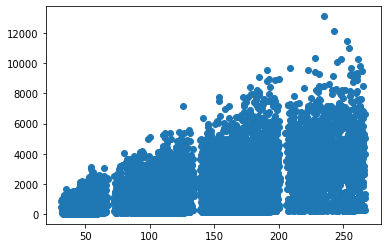

In [9]:
from matplotlib.pyplot import figure

plt.scatter(train_set['Item_MRP'], train_set['Item_Outlet_Sales'])
# figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

In [22]:
import matplotlib
import numpy as np

## 5. Using Linear Regression for Prediction


### Model 3 – Enter Linear Regression:

In [18]:
from sklearn.model_selection import train_test_split

In [41]:
X = train_set.loc[:,['Outlet_Establishment_Year', 'Item_MRP']].values
y = train_set.loc[:,['Item_Outlet_Sales']].values

In [43]:
# spliting the dataset
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [44]:
# fitting the Linear Regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
# Predicting on test set
pred = regressor.predict(x_test)
pred

array([[2497.55346227],
       [2696.50775934],
       [ 696.23212984],
       ...,
       [2303.69261539],
       [1353.83021752],
       [2090.39252327]])

In [47]:
# calculating score
regressor.score(x_test, y_test)

0.3297645566558769

In [46]:
# calculating mse
mse = np.mean((pred - y_test)**2)
mse

2026628.5667621796

Calculating coefficients of regressor i.e **w** and **b**

In [58]:
print("coefficients:")
print(f"w1: {regressor.coef_[0][0]}, w2: {regressor.coef_[0][1]}")
print("intercept:")
print(f"c: {regressor.intercept_[0]}")

coefficients:
w1: -7.937511910627553, w2: 15.526972396278486
intercept:
c: 15850.948145404465


## 6. Evaluating your Model – R square and adjusted R- square


In [59]:
# R-square test
regressor.score(x_test, y_test)

0.3297645566558769

### Model 4 – Linear regression with more variables

In [66]:
# loading big mart sales dataset
train_set = pd.read_csv('/home/garvit/Downloads/Compressed/bigmart-sales-data/Train.csv')
test_set = pd.read_csv('/home/garvit/Downloads/Compressed/bigmart-sales-data/Test.csv')

In [69]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [68]:
# Handling missing value

# train_set.dropna(inplace=True)
train_set['Item_Weight'].fillna(train_set['Item_Weight'].mean(), inplace=True)

In [70]:
from sklearn.model_selection import train_test_split

X = train_set.loc[:,['Outlet_Establishment_Year','Item_MRP','Item_Weight']].values
y = train_set['Item_Outlet_Sales'].values

x_train, x_test, y_train, y_test = train_test_split(X,y)

# fitting the Linear Regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
pred = regressor.predict(x_test)

In [72]:
# MSE
np.mean((pred - y_test)**2)

2103446.9719963465

In [81]:
## calculating coefficients

coeff = pd.DataFrame(train_set.columns)
coeff['Coefficient Estimate'] = pd.Series(regressor.coef_)
coeff.iloc[:3,:]

,0,Coefficient Estimate
0,Item_Identifier,-9.085390
1,Item_Weight,15.550803
2,Item_Fat_Content,-2.718771


In [82]:
# R- square
regressor.score(x_test, y_test)

0.3070307140479742

## 7. Using all the features for prediction

### Data Preprocessing

In [93]:
# Loading data
# loading big mart sales dataset
train_set = pd.read_csv('/home/garvit/Downloads/Compressed/bigmart-sales-data/Train.csv')
test_set = pd.read_csv('/home/garvit/Downloads/Compressed/bigmart-sales-data/Test.csv')

In [94]:
# imputing missing values

train_set['Item_Visibility'] = train_set['Item_Visibility'].replace(0,np.mean(train_set['Item_Visibility']))
train_set['Outlet_Establishment_Year'] = 2013 - train_set['Outlet_Establishment_Year']
train_set['Outlet_Size'].fillna('Small',inplace=True)
train_set['Item_Weight'].fillna(train_set['Item_Weight'].mean(), inplace=True)

# creating dummy variables to convert categorical into numeric values
mylist = list(train_set.select_dtypes(include=['object']).columns)
dummies = pd.get_dummies(train_set[mylist], prefix= mylist)
train_set.drop(mylist, axis=1, inplace = True)

X = pd.concat([train_set,dummies], axis =1 )

### Building the model

In [105]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline


# importing linear regression
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

# for cross validation
from sklearn.model_selection import train_test_split
X = train_set.drop('Item_Outlet_Sales',1)
x_train, x_cv, y_train, y_cv = train_test_split(X,train_set.Item_Outlet_Sales, test_size =0.3)

# training a linear regression model on train
lreg.fit(x_train,y_train)

# predicting on cv

pred_cv = lreg.predict(x_cv)

# calculating mse

mse = np.mean((pred_cv - y_cv)**2)

mse

1348171.96

# evaluation using r-square

lreg.score(x_cv,y_cv)

0.31833414598455345

## 11. Ridge Regression

In [106]:
from sklearn.linear_model import Ridge

## training the model
ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(x_train,y_train)

pred = ridgeReg.predict(x_cv)

# calculating mse

mse = np.mean((pred_cv - y_cv)**2)
print("mse: ", mse)

## calculating score 
ridgeReg.score(x_cv,y_cv)

mse:  2010043.2674506623


0.31843455945151977

In [107]:
x_train.shape

(5966, 4)